In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df = pd.read_csv(r'../Data/universities.csv')
df

Institution Name         Region  \
0     Massachusetts Institute of Technology (MIT)   North America   
1                          University of Cambridge         Europe   
2                             University of Oxford         Europe   
3                               Harvard University  North America   
4                              Stanford University  North America   
...                                            ...            ...   
1195                          Université de Sousse         Africa   
1196             Université Toulouse - Jean Jaurès         Europe   
1197                        Utah State University   North America   
1198         VSB - Technical University of Ostrava         Europe   
1199                   Vancouver Island University  North America   

             Country  Overall  Academic Reputation  Employer Reputation  \
0      United States    100.0                100.0                100.0   
1     United Kingdom     99.2                100.0                100.0   
2     United Kingdom     98.9                100.0                100.0   
3      United States     98.3                100.0                100.0   
4      United States     98.1                100.0                100.0   
...              ...      ...                  ...                  ...   
1195         Tunisia      NaN                  3.7                  1.1   
1196          France      NaN                 10.1                  2.6   
1197   United States      NaN                  6.6                  3.2   
1198         Czechia      NaN                  5.4                 10.3   
1199          Canada      NaN                  5.0                  3.3   

      Faculty Student Ratio  Citations Per Faculty  \
0                     100.0                  100.0   
1                     100.0                   92.3   
2                     100.0                   90.6   
3                      98.3                  100.0   
4                     100.0                   99.9   
...                     ...                    ...   
1195                   60.7                    1.7   
1196                    1.2                    7.0   
1197                    6.3                   24.4   
1198                   15.5                    4.3   
1199                   58.0                    1.1   

      International Faculty Ratio  International Students Ratio  \
0                           100.0                          88.2   
1                           100.0                          95.8   
2                            98.2                          98.2   
3                            84.6                          66.8   
4                            99.9                          51.2   
...                           ...                           ...   
1195                          1.1                           2.1   
1196                         28.5                          21.6   
1197                          1.1                           1.7   
1198                          8.4                          22.0   
1199                          NaN                           NaN   

      International Research Network  Employment Outcomes  Sustainability  
0                               94.3                100.0            95.2  
1                               99.9                100.0            97.3  
2                              100.0                100.0            97.8  
3                              100.0                100.0            96.7  
4                               95.8                100.0            94.4  
...                              ...                  ...             ...  
1195                             1.2                  7.9             1.0  
1196                            12.5                  6.7             1.1  
1197                            23.8                  9.5            15.8  
1198                             1.8                  9.4             8.4  
1199          

In [44]:
for column in df.columns:
    if column != 'Institution Name' and \
        column != 'Region' and \
        column != 'Country' and \
        column != 'Overall':
        median = df[column].median()
        df[column].fillna(median,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Institution Name                1200 non-null   object 
 1   Region                          1200 non-null   object 
 2   Country                         1200 non-null   object 
 3   Overall                         602 non-null    float64
 4   Academic Reputation             1200 non-null   float64
 5   Employer Reputation             1200 non-null   float64
 6   Faculty Student Ratio           1200 non-null   float64
 7   Citations Per Faculty           1200 non-null   float64
 8   International Faculty Ratio     1200 non-null   float64
 9   International Students Ratio    1200 non-null   float64
 10  International Research Network  1200 non-null   float64
 11  Employment Outcomes             1200 non-null   float64
 12  Sustainability                  12

**Câu hỏi: Các yếu tố nào ảnh hưởng đến danh tiếng của trường?.**
- Lợi ích: Có thể tìm ra các mô típ chung làm tăng danh tiếng cũng của trường hoặc những yếu tố mà các trường chưa có độ phủ sóng tốt cần cải thiện.
- Để làm rõ vấn đề này chúng ta sẽ phân tích mối quan hệ giữa `Academic Reputation` với các cột còn lại. Các yếu tố sẽ được tìm ra nếu có sự xuất hiện của 1 pattern bất kì giữa các cột.

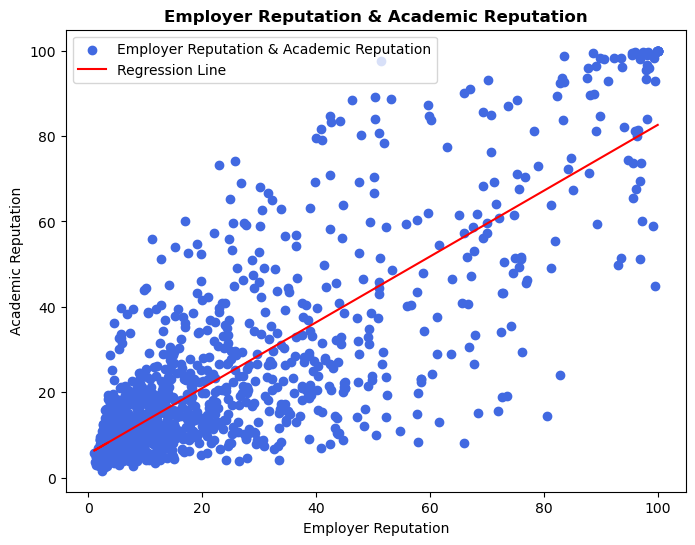

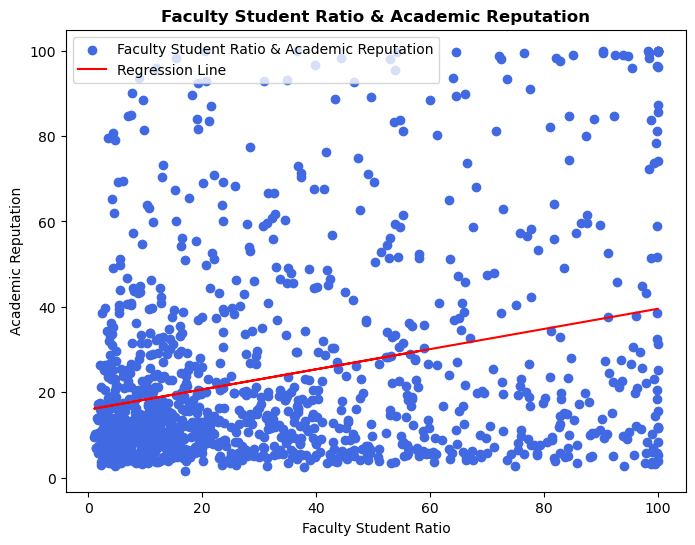

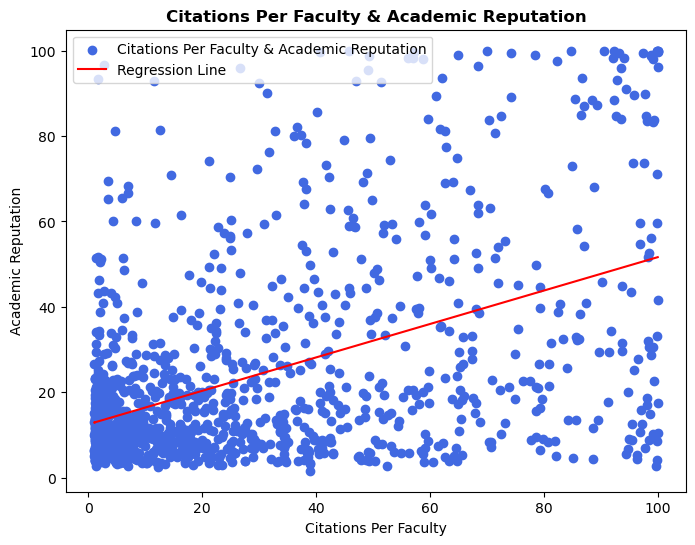

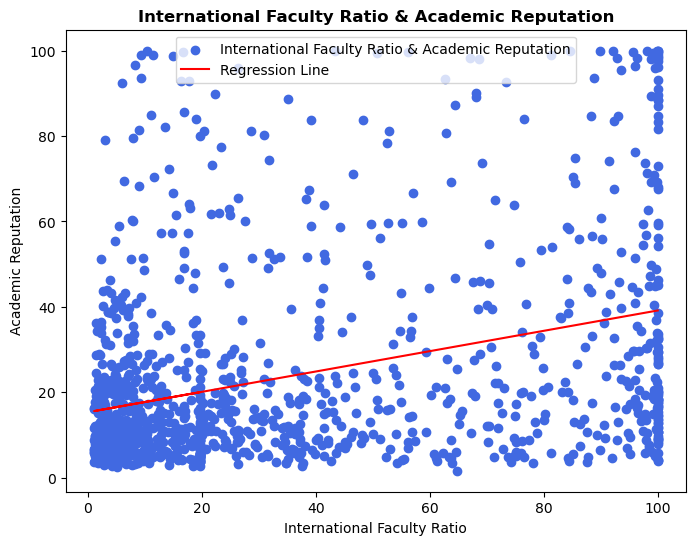

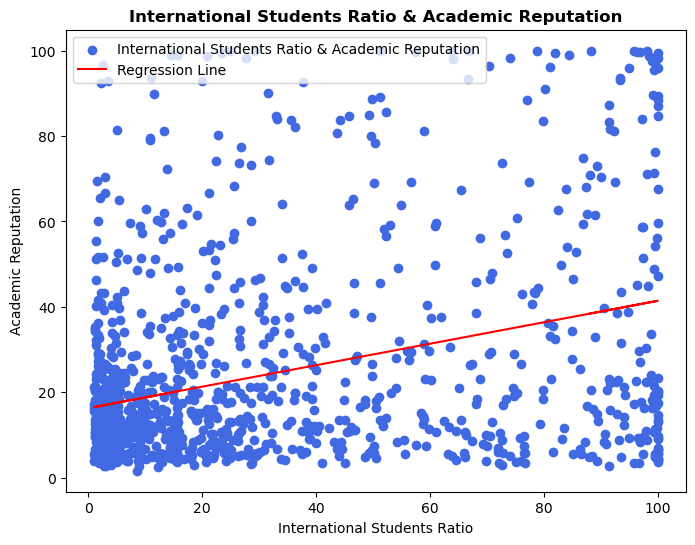

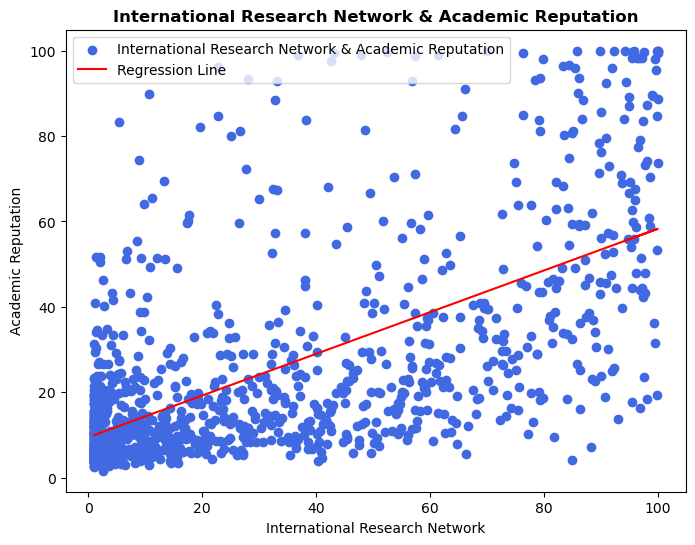

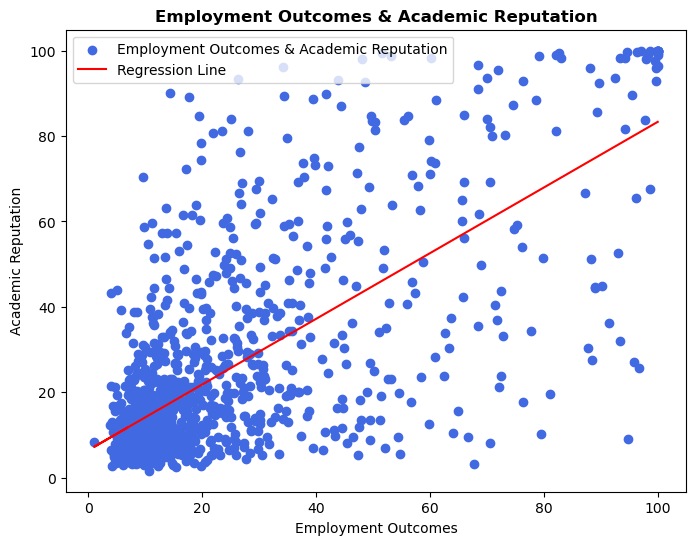

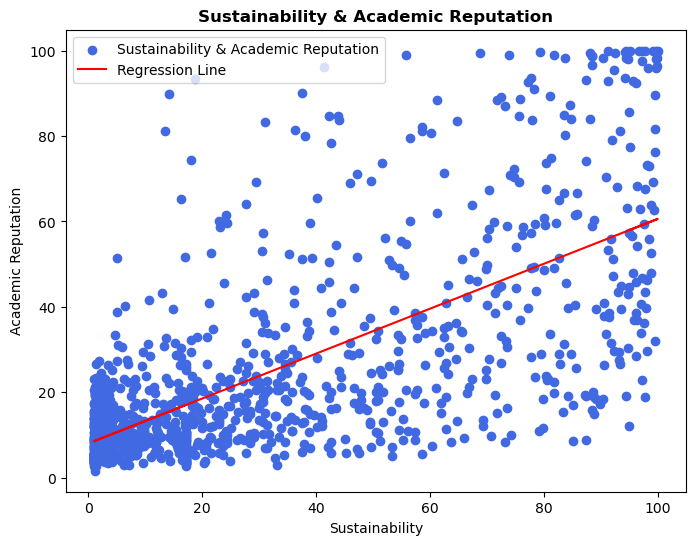

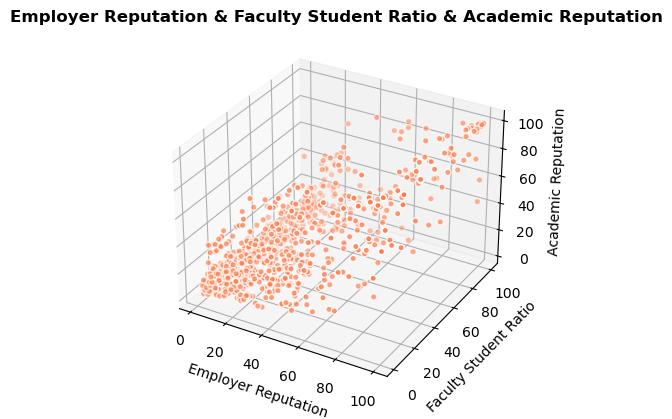

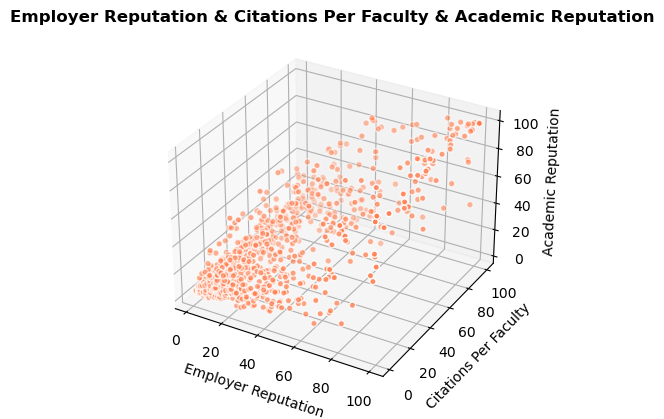

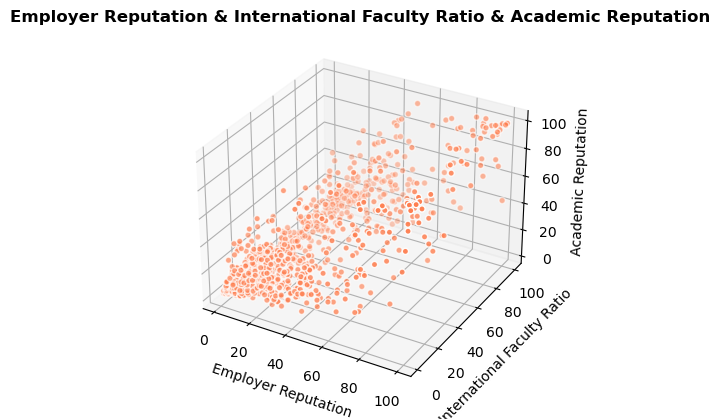

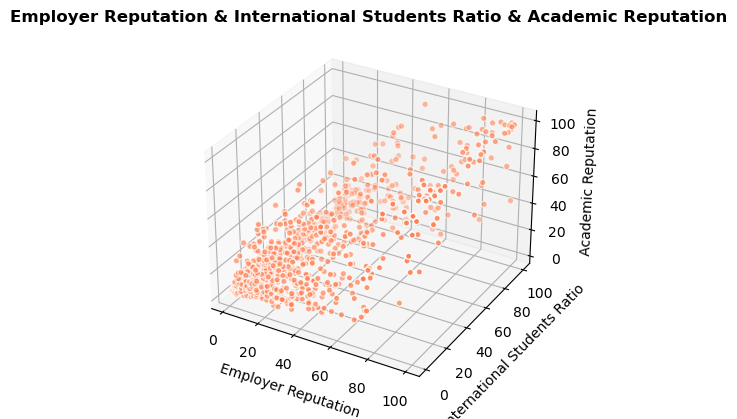

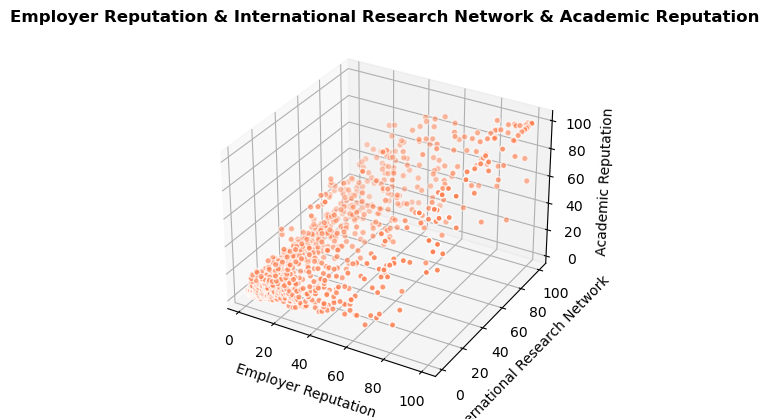

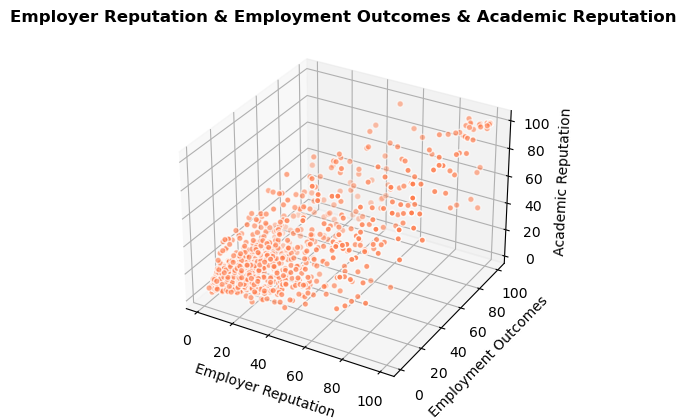

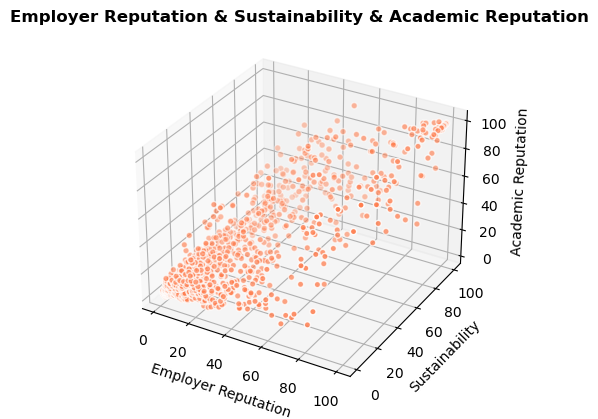

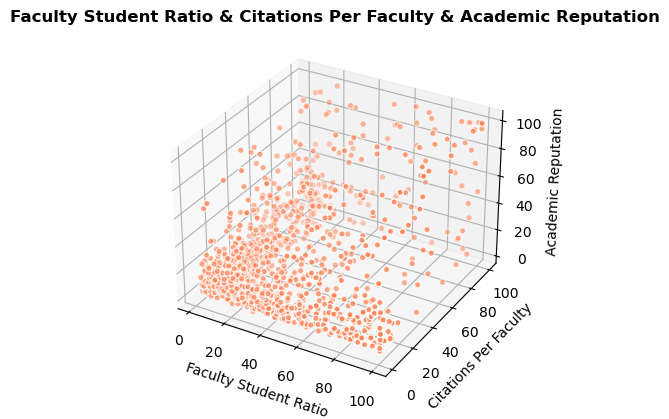

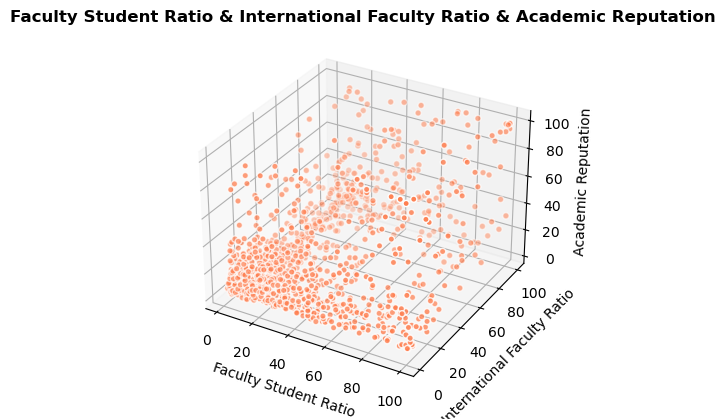

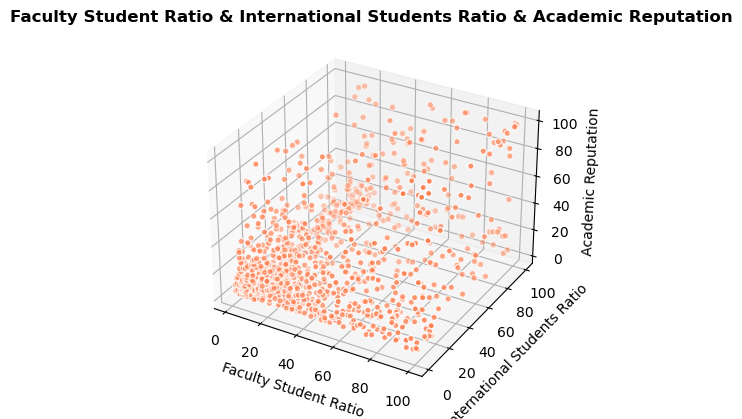

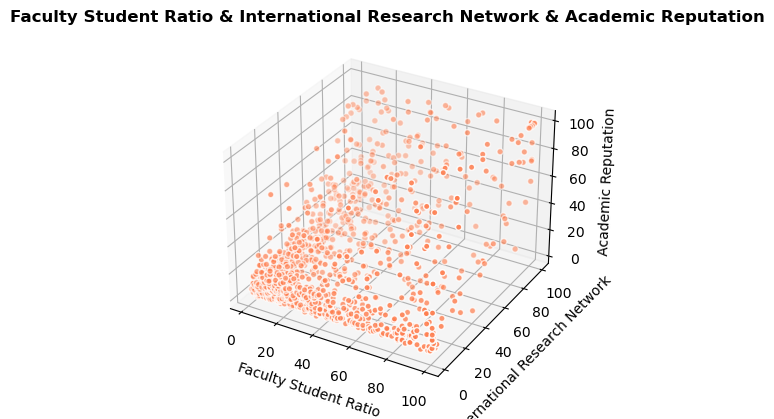

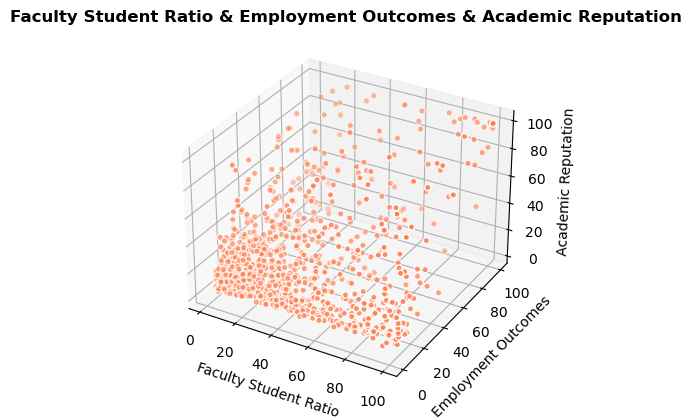

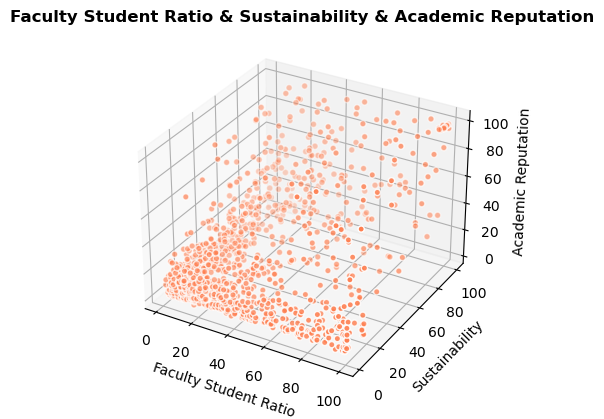

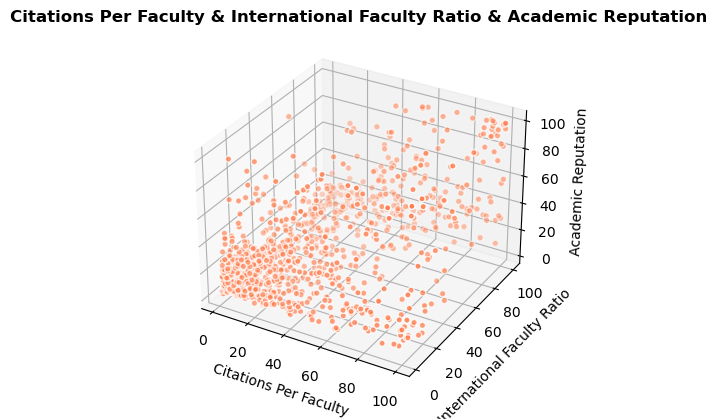

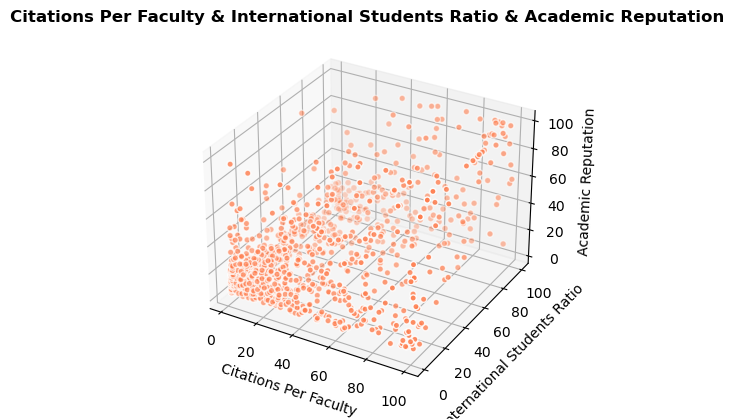

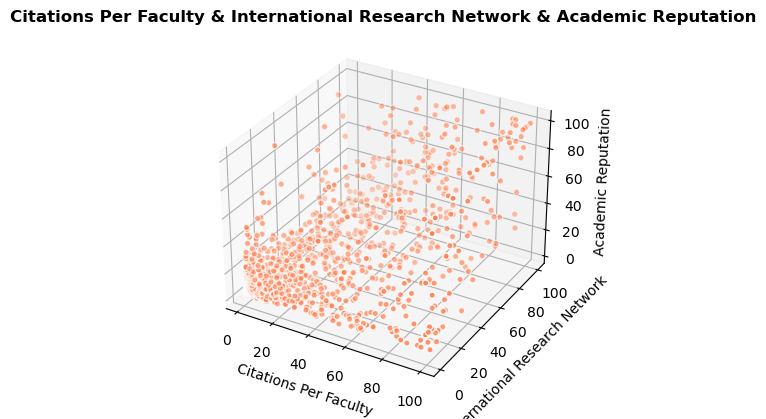

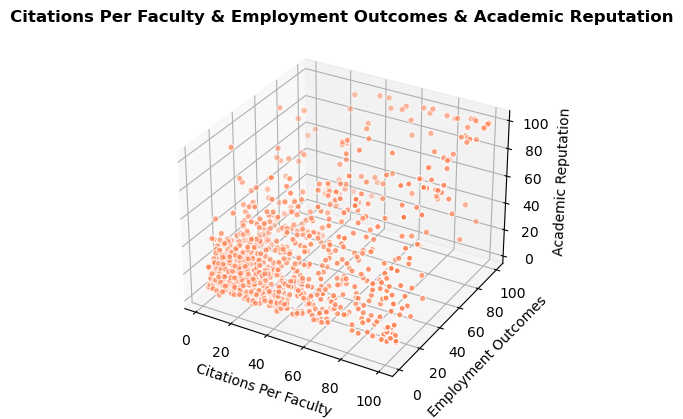

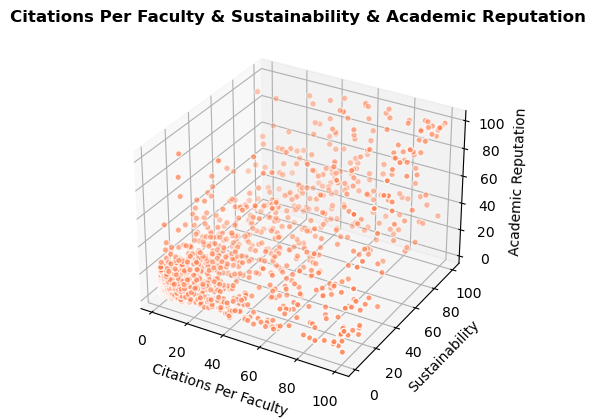

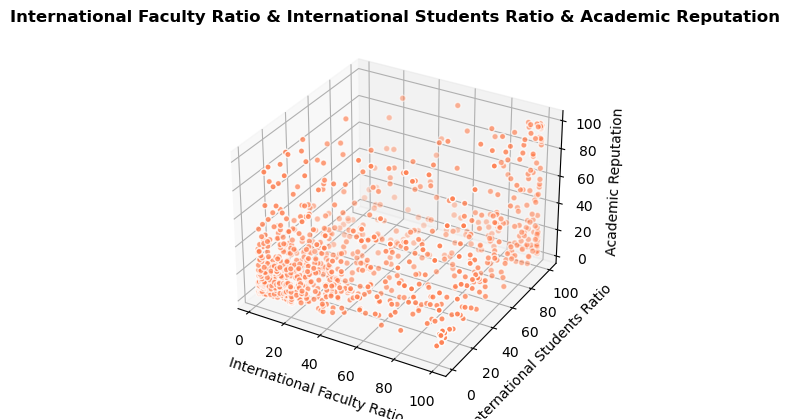

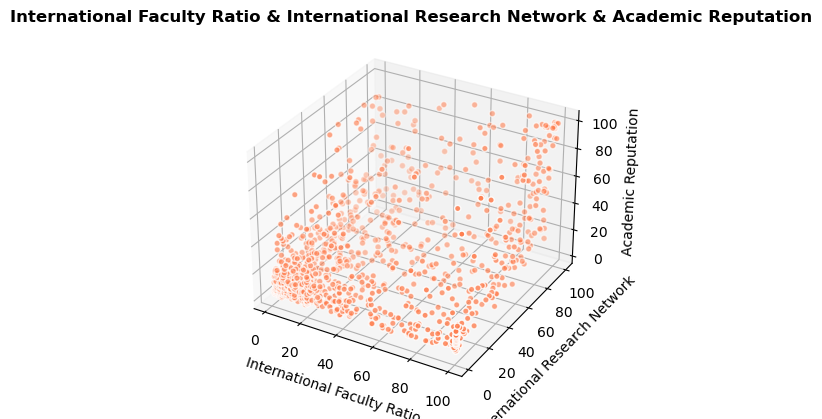

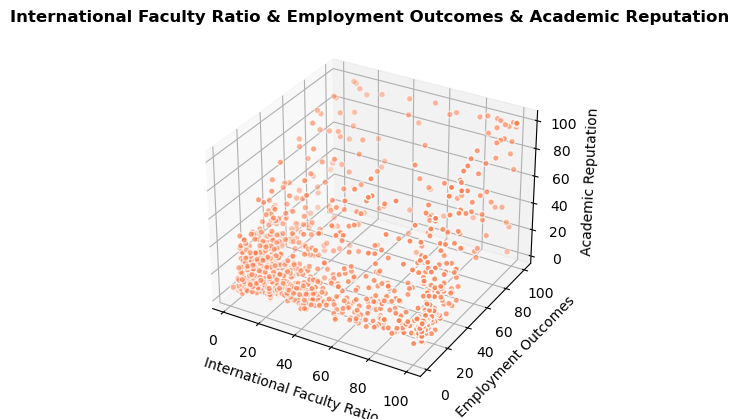

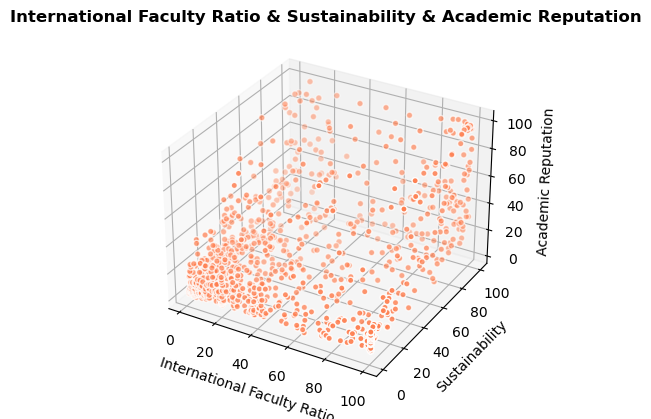

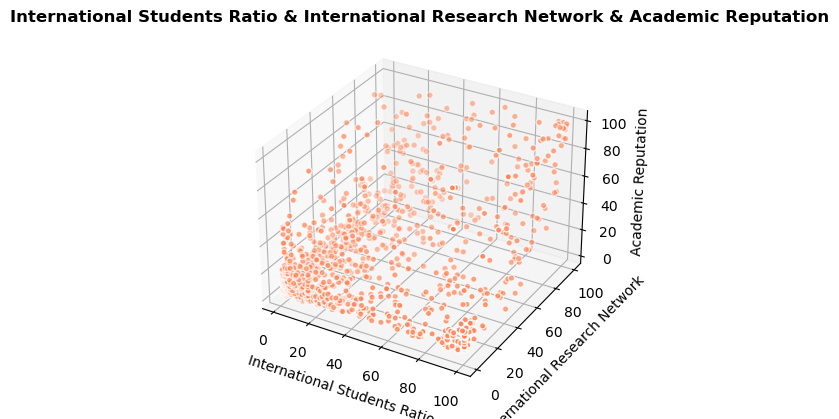

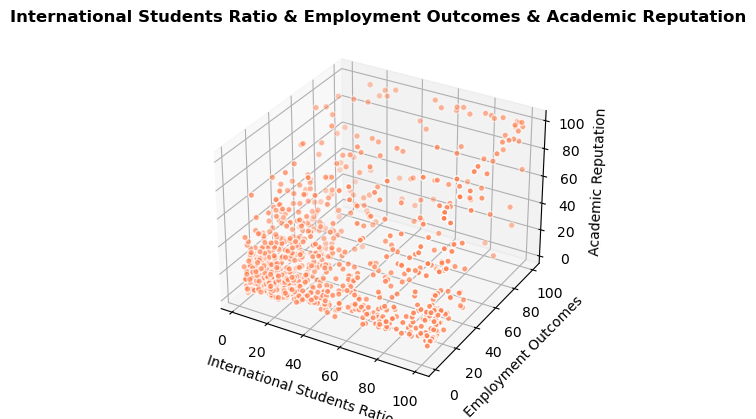

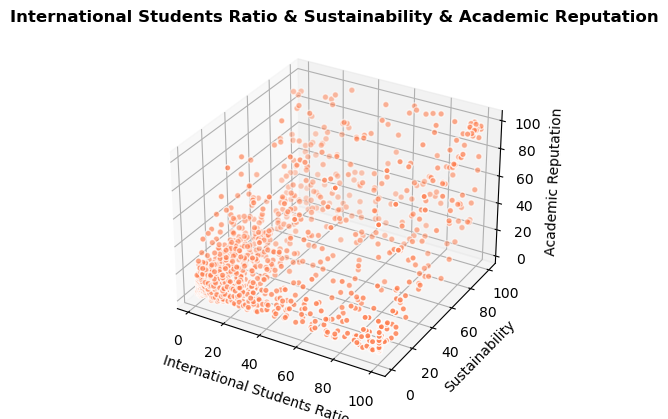

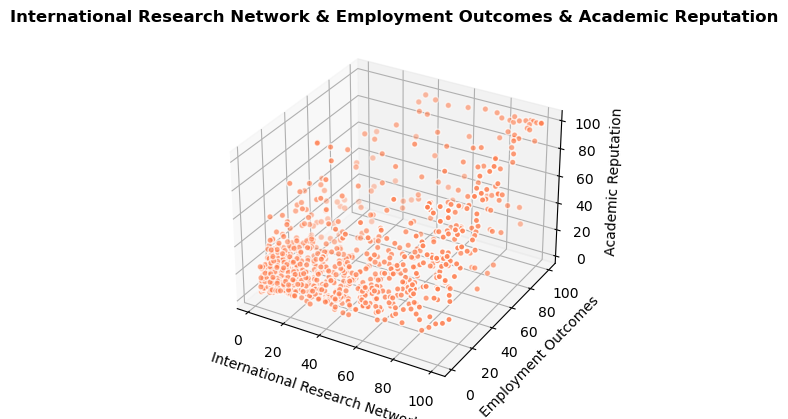

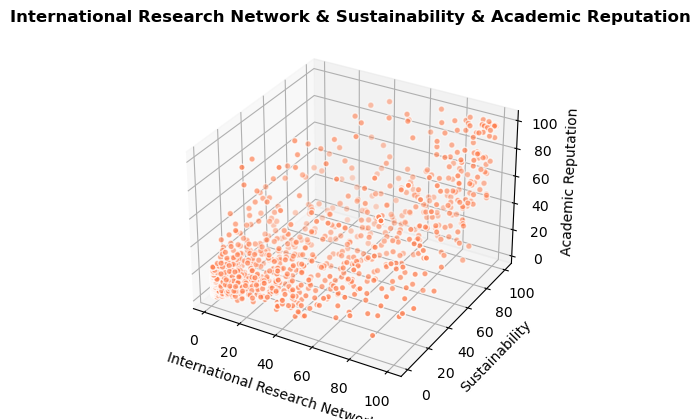

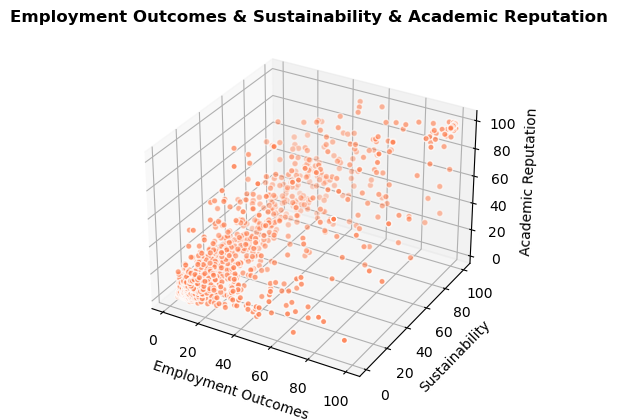

In [54]:
def draw_scatter_plot(X,Y,xlabel,ylabel,title,label):
    slope, intercept = np.polyfit(X, Y, 1)
    line = slope * X + intercept
    plt.figure(figsize=(8, 6))
    plt.scatter(X, Y, label=label, color = 'royalblue')
    plt.plot(X, line, color='red', label='Regression Line')
    plt.xlabel(xlabel=xlabel)
    plt.ylabel(ylabel=ylabel)
    plt.title(label=title,fontweight='bold')
    plt.legend()
    plt.show()

def draw_scatter_plot_3D(X,Y,Z,xlable,ylable,zlabel,title,label):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.scatter(X,Y,Z,c='coral',marker='o', edgecolor = 'white')
    ax.set_xlabel(xlabel= xlable)
    ax.set_ylabel(ylabel=ylable)
    ax.set_zlabel(zlabel=zlabel)
    ax.set_title(label=title,fontweight='bold')
    plt.show()


def draw_scatter_plot_for_all_columns(df: pd.DataFrame,column_name: str):
    for column in df.columns:
        if column != 'Institution Name' and \
        column != 'Region' and \
        column != 'Country' and \
        column != 'Overall' and \
        column != column_name:
            title = f"{column} & {column_name}"
            draw_scatter_plot(df[column],df[column_name],column,column_name,title,title)

def draw_scatter_plot_3D_for_all_columns(df: pd.DataFrame, column_name: str):
    columns = df.columns
    n = len(columns)

    for i in range(4,n):
        if columns[i] != column_name:
            for j in range(i+1,n):
                if columns[j] != column_name:
                    title = f"{columns[i]} & {columns[j]} & {column_name}"
                    draw_scatter_plot_3D(df[columns[i]],df[columns[j]],df[column_name],columns[i],columns[j],column_name,title,title)

draw_scatter_plot_for_all_columns(df,'Academic Reputation')
draw_scatter_plot_3D_for_all_columns(df,'Academic Reputation')

### Trả lời:
- Ở các biểu đồ thể hiện quan hệ giữa ba thuộc tính `Academic Reputation`, `International Students Ratio` và `Sustainability`, chúng ta đều thấy rằng mật độ các điểm ở gốc toạ độ luôn là rất dày đặc. Từ đó có thể đưa ra một dự đoán rằng, tỉ lệ sinh viên quốc tế it và cam kết và chính sách phát triển bền vững không dảm bảo sẽ dẫn đến tầm ảnh hưởng của trường trong cộng đồng học thuật trở nên hạn chế hơn.
- Ngoài gốc toạ độ, ta thấy các điểm tập trung chủ yếu dọc theo hai trục `International Students Ratio` và `Sustainability`. Điều này giải thích rằng cả hai yếu tố này là không thể thiếu đối với `Academic Reputation`. Một phần nhỏ các điểm còn lại rải rác trong không gian biều đồ.
- Do những yếu tố nêu trên, ta có thể kết luận các trường đại học có tầm ảnh hưởng trong giới học thuật thường đáp ứng được hai yếu tố là tỷ lệ du học sinh và cam kết bền vững của trường.